In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [75]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(target, columns=["price"])

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [94]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [95]:
from sklearn.manifold import TSNE

In [113]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:' f'{X_train_scaled.shape}')
print('После:' f'{X_train_tsne.shape}')

До:(404, 13)
После:(404, 2)


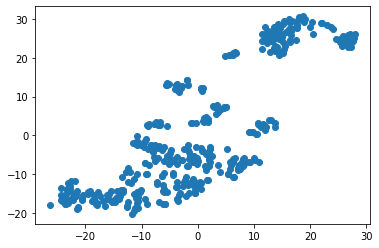

In [97]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [98]:
from sklearn.cluster import KMeans

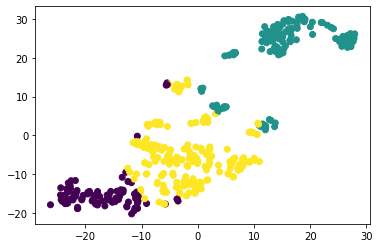

In [99]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [121]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))

Кластер 0: 0.07356558139534884
Кластер 1: 10.797028425196851


In [116]:
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))

Кластер 0: 27.78837209302326
Кластер 1: 16.165354330708663


In [129]:
tsne1 = TSNE(n_components=2, learning_rate=250, random_state=42)
X_test_tsne = tsne1.fit_transform(X_test_scaled)
print('До:' f'{X_train_scaled.shape}')
print('После:' f'{X_train_tsne.shape}')

До:(404, 13)
После:(404, 2)


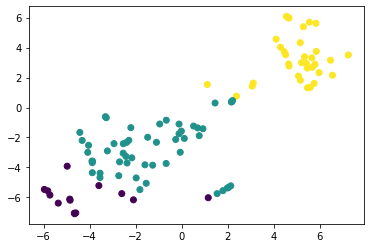

In [130]:
kmeans_1 = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_test = kmeans_1.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [131]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))

Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076


In [132]:
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))

Кластер 0: 33.871428571428574
Кластер 1: 21.552830188679245
